## 1. Importing Libraries

In [1]:
#importing libraries and data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path

path = r'C:\Users\dequw\Documents\UFC Project Folder'

In [4]:
#importing data set
df_UFC = pd.read_csv(os.path.join(path, 'Prepared Data UFC', 'UFC_Prepared_Data.csv'), index_col = False)

## 2.Data Cleaning

In [5]:
df_UFC.columns

Index(['Unnamed: 0', 'r_fighter', 'b_fighter', 'date_of_fight', 'location',
       'winner', 'weight_class', 'b_wins', 'b_losses',
       'b_win_by_decision_majority', 'b_win_by_decision_split',
       'b_win_by_decision_unanimous', 'b_win_by_ko/tko', 'b_win_by_submission',
       'b_win_by_tko_doctor_stoppage', 'b_stance', 'b_height_cms',
       'b_Reach_cms', 'b_weight_lbs', 'r_wins', 'r_losses',
       'r_win_by_decision_majority', 'r_win_by_decision_split',
       'r_win_by_decision_unanimous', 'r_win_by_ko/tko', 'r_win_by_submission',
       'r_win_by_tko_doctor_stoppage', 'r_stance', 'r_height_cms',
       'r_Reach_cms', 'r_weight_lbs', 'b_age', 'r_age'],
      dtype='object')

In [6]:
df_UFC.head(20)

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,location,winner,weight_class,b_wins,b_losses,b_win_by_decision_majority,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age
0,0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,Bantamweight,1,1,0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,Middleweight,2,0,0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,Heavyweight,0,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,WomenStrawweight,0,0,0,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,WomenBantamweight,4,1,0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
5,5,Leonardo Santos,Grant Dawson,3/20/2021,"Las Vegas, Nevada, USA",Blue,Lightweight,4,0,0,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
6,6,Song Kenan,Max Griffin,3/20/2021,"Las Vegas, Nevada, USA",Blue,Welterweight,4,6,1,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0
7,7,Derek Brunson,Kevin Holland,3/20/2021,"Las Vegas, Nevada, USA",Red,Middleweight,8,2,0,...,4,7,1,0,Southpaw,185.42,195.58,185.0,28.0,37.0
8,8,Montel Jackson,Jesse Strader,3/20/2021,"Las Vegas, Nevada, USA",Red,Bantamweight,0,0,0,...,2,0,1,0,Southpaw,177.80,190.50,135.0,29.0,28.0
9,10,Manel Kape,Matheus Nicolau,3/13/2021,"Las Vegas, Nevada, USA",Blue,Flyweight,3,1,0,...,0,0,0,0,Southpaw,165.10,172.72,125.0,28.0,27.0


In [7]:
df_UFC.shape

(4954, 33)

## Missing Values

In [8]:
# Check for missing values

df_UFC.isnull().sum()

# No missing values to handle

Unnamed: 0                      0
r_fighter                       0
b_fighter                       0
date_of_fight                   0
location                        0
winner                          0
weight_class                    0
b_wins                          0
b_losses                        0
b_win_by_decision_majority      0
b_win_by_decision_split         0
b_win_by_decision_unanimous     0
b_win_by_ko/tko                 0
b_win_by_submission             0
b_win_by_tko_doctor_stoppage    0
b_stance                        5
b_height_cms                    0
b_Reach_cms                     0
b_weight_lbs                    0
r_wins                          0
r_losses                        0
r_win_by_decision_majority      0
r_win_by_decision_split         0
r_win_by_decision_unanimous     0
r_win_by_ko/tko                 0
r_win_by_submission             0
r_win_by_tko_doctor_stoppage    0
r_stance                        4
r_height_cms                    0
r_Reach_cms   

##### Duplicates check

In [9]:
dups = df_UFC.duplicated()

In [10]:
dups.shape # No dups

(4954,)

##### Extreme values checks

C:\Users\dequw\AppData\Local\Temp\ipykernel_8740\1922259936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_UFC['r_wins'], bins=25) # Shows extreme values
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

<Axes: xlabel='r_wins', ylabel='Density'>

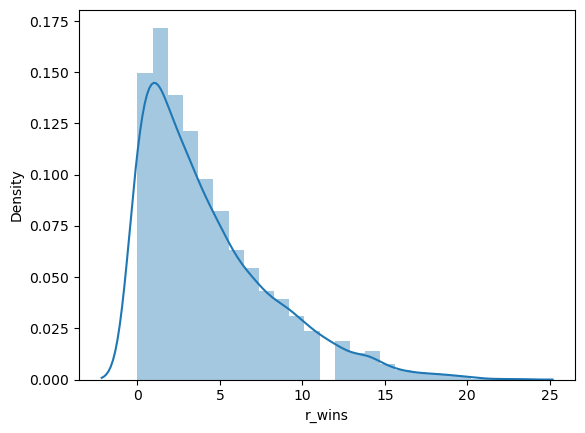

In [11]:
sns.distplot(df_UFC['r_wins'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\dequw\AppData\Local\Temp\ipykernel_8740\518808548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_UFC['b_wins'], bins=25) # Shows extreme values
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dequw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

<Axes: xlabel='b_wins', ylabel='Density'>

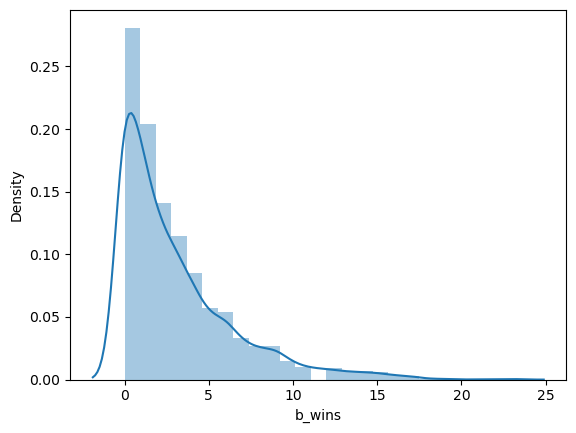

In [12]:
sns.distplot(df_UFC['b_wins'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [13]:
df_UFC['r_wins'].mean() # Check the mean

4.276342349616471

In [14]:
df_UFC['r_wins'].median() # Check the median

3.0

In [15]:
df_UFC['r_wins'].max() # Check the max

23

In [16]:
df_UFC['b_wins'].mean() # Check the mean

3.0159467097295116

In [17]:
df_UFC['b_wins'].median() # Check the median

2.0

In [18]:
df_UFC['b_wins'].max() # Check the max

23

### 3. Data prep for regression analysis 

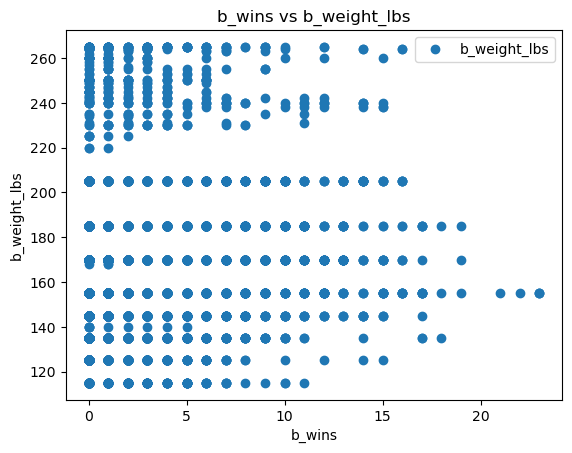

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_UFC.plot(x = 'b_wins', y='b_weight_lbs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('b_wins vs b_weight_lbs')  
plt.xlabel('b_wins')  
plt.ylabel('b_weight_lbs')  
plt.show()

# 5.The heavier the b fighter (over 160), the more wins they have.

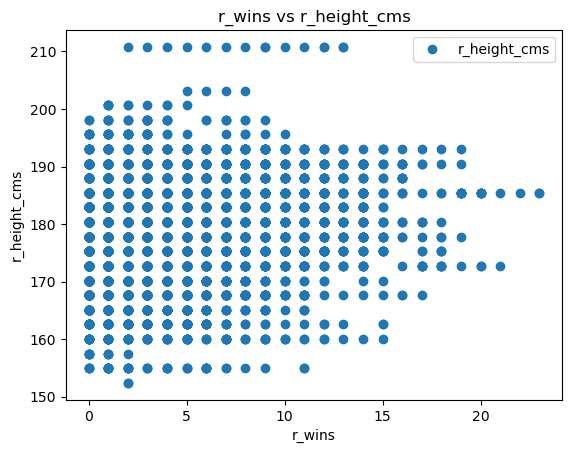

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_UFC.plot(x = 'r_wins', y='r_height_cms',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('r_wins vs r_height_cms')  
plt.xlabel('r_wins')  
plt.ylabel('r_height_cms')  
plt.show()

If the r fighter is taller than 165 cms, they have a higher chance of winning

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_UFC['b_wins'].values.reshape(-1,1)
y = df_UFC['b_weight_lbs'].values.reshape(-1,1)

In [22]:
X

array([[1],
       [2],
       [0],
       ...,
       [1],
       [0],
       [3]], dtype=int64)

In [23]:
y

array([[135.],
       [205.],
       [241.],
       ...,
       [205.],
       [205.],
       [185.]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

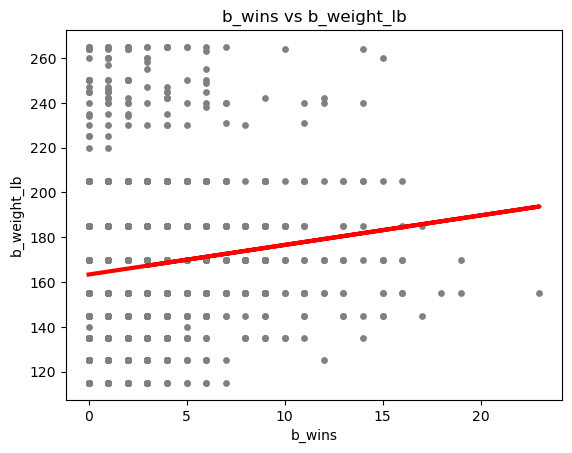

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('b_wins vs b_weight_lb')
plot_test.xlabel('b_wins')
plot_test.ylabel('b_weight_lb')
plot_test.show()

#### 5.The line seems to prove my hypothesis correct as the heavier the b fighter is (over 160), the more wins they have. 

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.32037801]]
Mean squared error:  1115.8219723031702
R2 score:  0.010497409106324018


In [31]:
y_predicted

array([[163.3351496 ],
       [163.3351496 ],
       [168.61666164],
       ...,
       [165.97590562],
       [163.3351496 ],
       [167.29628363]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,170.0,163.335150
1,135.0,163.335150
2,170.0,168.616662
3,185.0,168.616662
4,145.0,163.335150
5,125.0,165.975906
6,185.0,163.335150
7,170.0,167.296284
8,205.0,163.335150
9,205.0,164.655528


In [33]:
##### 12. The Actual and Predicted y values have a differential of being 30-45 lbs off from one another while there are some that are pretty close. 

##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.32037801]]
Mean squared error:  1160.373702865047
R2 score:  0.017760455017481913


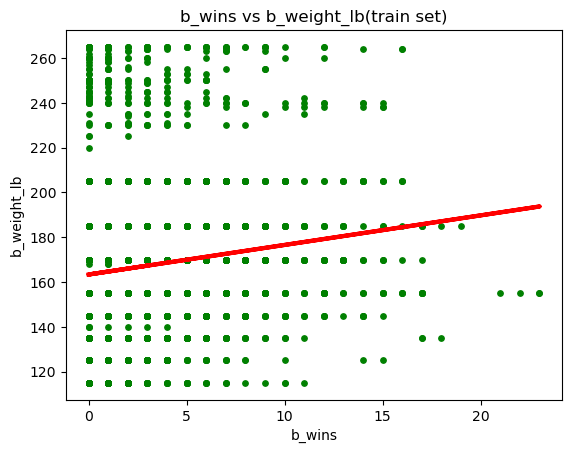

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('b_wins vs b_weight_lb(train set)')
plot_test.xlabel('b_wins')
plot_test.ylabel('b_weight_lb')
plot_test.show()

##### 10. This line appears to have a positive regression meaning fighters over 160 lbs have a higher chance of winning their fights. A lot of plots are around the line even thought a huge amount is clustered in the 240 lbs to 260lbs region.  Possible bias could have been weight and wins reported incorrectly both by officials and the data gatherers for this data set. But being this info is offical from the UFC site and it is a profesisonalized sport, I would these numbers are accurate (reasoning for keeping the outliers).

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df_UFC['r_wins'].values.reshape(-1,1)
y2 = df_UFC['r_height_cms'].values.reshape(-1,1)

In [39]:
X2

array([[1],
       [4],
       [4],
       ...,
       [0],
       [4],
       [2]], dtype=int64)

In [40]:
y2

array([[170.18],
       [182.88],
       [187.96],
       ...,
       [185.42],
       [182.88],
       [185.42]])

In [41]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [45]:

y2_predicted_train = regression.predict(X2_train) # This is predicting X_train!

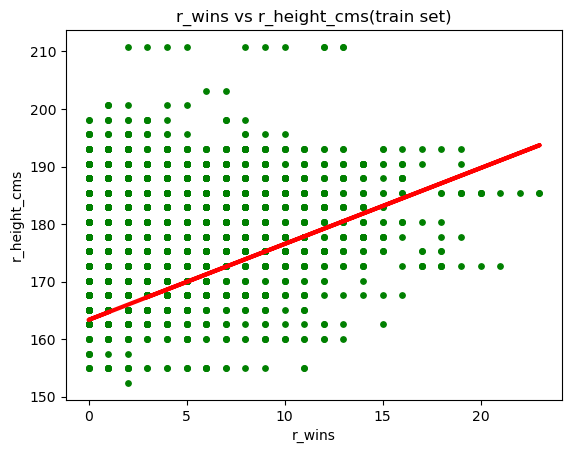

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('r_wins vs r_height_cms(train set)')
plot_test.xlabel('r_wins')
plot_test.ylabel('r_height_cms')
plot_test.show()